<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/ANN_load_neural_network_mar_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
import sklearn
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 6.7MB/s 


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 269 (delta 17), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (269/269), 667.03 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 37.50 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 


In [8]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 36.38 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [9]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 269 (delta 17), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (269/269), 667.03 KiB | 5.96 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [10]:
from psd_mahotas import Mahotas

In [11]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [12]:
from big_segment_new import Segmenta  # got image provided segmented

In [13]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [14]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)


Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 35.78 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [15]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 39.51 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [16]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

foto_segmentada=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [17]:
img = foto_segmentada
df=Segmenta(img)
del df['Width']

In [18]:
print(df)

             0           1           2    ...         781         782         783
0     141.958252  151.109283  159.533905  ...  166.050873  109.065147   57.707760
1     112.191452  110.530838  104.947845  ...  128.297424  139.087646  155.758957
2     143.684967  150.221252  151.866180  ...  152.013840  156.291855  158.110138
3     123.934212  125.525620  124.871735  ...  125.631729  132.959991  137.633713
4     103.245453   99.872208   95.409271  ...   43.437042   42.561081   42.139988
...          ...         ...         ...  ...         ...         ...         ...
1995  117.416664  118.055557  117.722221  ...   43.611111   45.361111   48.555557
1996   57.990753   57.493195   57.213638  ...   81.133575   74.856918   74.201347
1997   81.677063   81.031158   80.622849  ...   34.708961   39.690125   44.254520
1998    1.076679    0.910118    0.922735  ...   73.804977   74.550880   73.400215
1999   48.634445   57.324448   64.279999  ...   66.784447   68.143341   69.895561

[6000 rows x 78

In [19]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_ANN.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado/MarquesGabi_Routines


In [20]:
test_images = np.array(df)

prediction = model.predict(test_images)


print(len(prediction))

6000


In [21]:
Grao = []
for i in range(len(prediction)):
  if(prediction[i]==0):
    Grao.append(i)

print(Grao)
    

[90, 91, 169, 405, 472, 566, 819, 842, 860, 1013, 1355, 1519, 1536, 1754, 1776, 1997, 2435, 2452, 2608, 2618, 3846, 3914, 4037, 4070, 4222, 4435, 4748, 4893, 5216, 5237, 5300, 5434, 5626, 5634, 5689, 5924]


In [22]:
indice = Grao
# grain class is number zero

In [25]:
print(len(Grao))

36


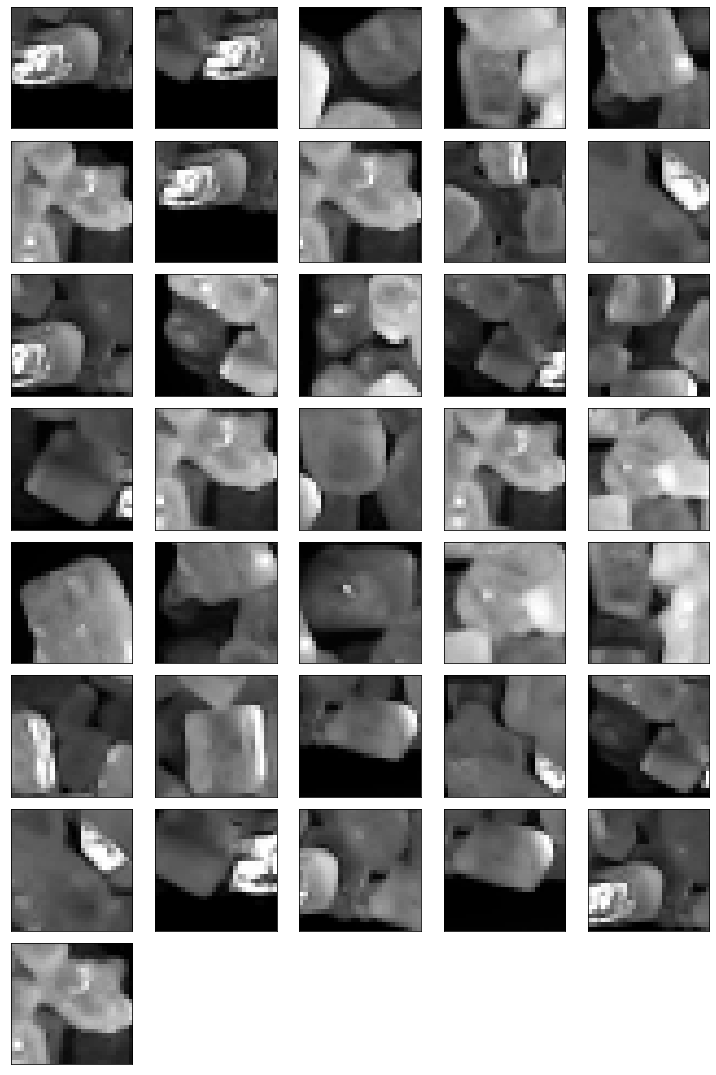

In [23]:

Num = len(Grao)
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)


for i in range(Num):
  ixx = indice[i]
  data=np.array(df.iloc[ixx,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

In [24]:
print(wxkxkk)

NameError: ignored

In [ ]:
print(wxkxkk)
img = foto_segmentada
df=Segmenta(img)

In [ ]:
#y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

In [ ]:
indice =[]
count = 0
for valor in y_pred:
  if(valor == 0):
    indice.append(count)
  count = count +1
print(indice)
print(len(indice))


In [ ]:
del df['Width']
print(df)

In [ ]:
indice

In [ ]:
print(wzxz)

In [ ]:
# print(y_pred.ravel())

In [ ]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [ ]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [ ]:
df.head()

In [ ]:
Size=28
qual_img=64
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [ ]:
mean_value = np.mean(img)
img_new = img.copy()

In [ ]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [ ]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

In [ ]:
Area_All, Diameter_All=PSDArea(df_size) 


In [ ]:
df_size.shape

In [ ]:
# print(Area_All)
print(Diameter_All)

In [ ]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new

In [ ]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

In [ ]:
np.sum(np.array(Perc_value))

In [ ]:
plt.plot( Perc_value,Perc_new )

In [ ]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [ ]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

In [ ]:
#plt.plot(Diam)
plt.plot(Diameter_All)

In [ ]:
plt.plot(Diam1)

In [ ]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

In [ ]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

In [ ]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)